# House Price Predictor

In [1]:
import pandas as pd

In [2]:
housing= pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.28595,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.70576,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.56100,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.88400,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.20900,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.62900,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015217129A08>,
      dtype=object)

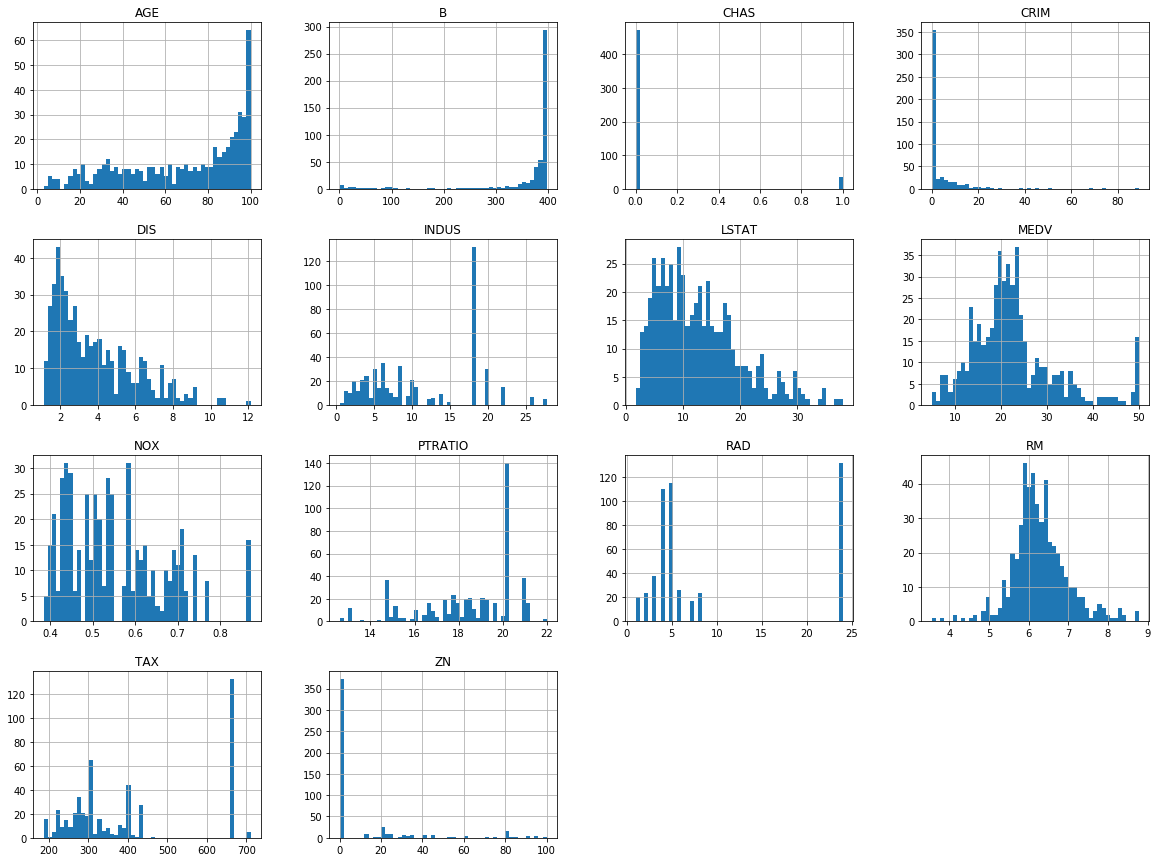

In [8]:
#For plotting Histogram Plot
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

# Train-Test Splitting

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(43)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=43)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 404
Rows in test set:102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=43)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing = strat_train_set.copy()

# Looking for Correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001521AA3D908>,
      dtype=object)

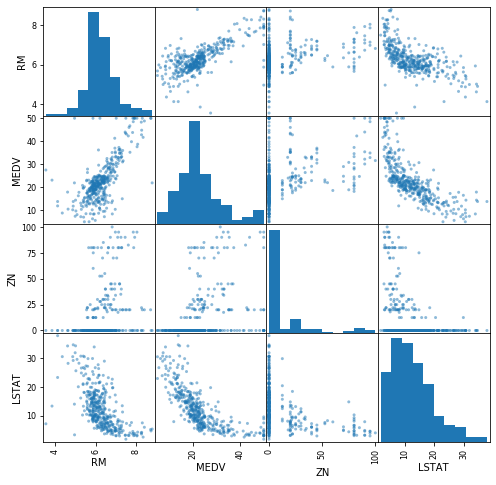

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['RM', "MEDV","ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize =(8,8))

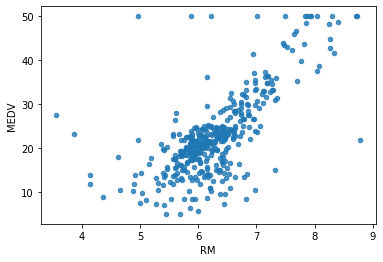

In [16]:
housing.plot(kind= "scatter", x="RM", y="MEDV", alpha=0.8)

# Trying Out Attribute Combinations

In [17]:
housing['TAX_RM']= housing['TAX']/housing['RM']

In [18]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3,45.148895
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9,57.634409
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5,65.828161
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,34.204982
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74,29.0,50.845050


In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.702460
ZN         0.376261
B          0.310947
DIS        0.251014
CHAS       0.144420
RAD       -0.359158
CRIM      -0.370124
AGE       -0.387703
NOX       -0.415093
TAX       -0.454164
INDUS     -0.492117
PTRATIO   -0.502687
TAX_RM    -0.522662
LSTAT     -0.733197
Name: MEDV, dtype: float64

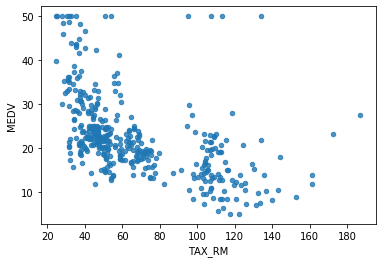

In [20]:
housing.plot(kind= "scatter", x="TAX_RM", y="MEDV", alpha=0.8)

In [21]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [22]:
#To take care of missing attributes, you have three options:
#    1.Get rid of the missing data points 
#    2.Get rid of the whole attribute
#    3.Set the value to some value(0,mean or median)

In [23]:
a=housing.dropna(subset=["RM"]) #no change in original data
# housing.shape
a.shape

(399, 13)

In [24]:
housing.drop("RM", axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
196,0.04011,80.0,1.52,0,0.404,34.1,7.3090,2,329,12.6,396.90,4.08
199,0.03150,95.0,1.47,0,0.403,15.3,7.6534,3,402,17.0,396.90,4.56
150,1.65660,0.0,19.58,0,0.871,97.3,1.6180,5,403,14.7,372.80,14.10
97,0.12083,0.0,2.89,0,0.445,76.0,3.4952,2,276,18.0,396.90,4.21
299,0.05561,70.0,2.24,0,0.400,10.0,7.8278,5,358,14.8,371.58,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.14231,0.0,10.01,0,0.547,84.2,2.2565,6,432,17.8,388.74,10.45
50,0.08873,21.0,5.64,0,0.439,45.7,6.8147,4,243,16.8,395.56,13.45
26,0.67191,0.0,8.14,0,0.538,90.3,4.6820,4,307,21.0,376.88,14.81
391,5.29305,0.0,18.10,0,0.700,82.5,2.1678,24,666,20.2,378.38,18.76


In [25]:
median = housing["RM"].median()

In [26]:
housing["RM"].fillna(median)

196    7.287
199    6.975
150    6.122
97     8.069
299    7.041
       ...  
114    6.176
50     5.963
26     5.813
391    6.051
466    5.952
Name: RM, Length: 404, dtype: float64

In [27]:
housing.shape

(404, 13)

In [28]:
housing.describe()  #Before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.389039,11.431931,11.070223,0.069307,0.552525,6.277283,68.549752,3.806113,9.259901,402.415842,18.372525,358.647847,12.542376
std,8.283193,23.764032,6.863162,0.254290,0.115198,0.725407,27.629534,2.121326,8.524044,165.210041,2.218188,89.345606,7.093397
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.082598,0.000000,5.190000,0.000000,0.448000,5.876500,45.325000,2.070275,4.000000,279.000000,16.900000,376.925000,7.177500
50%,0.247510,0.000000,9.125000,0.000000,0.532000,6.176000,76.700000,3.175750,5.000000,330.000000,18.900000,392.015000,11.265000
75%,3.023262,12.500000,18.100000,0.000000,0.624000,6.617000,93.650000,5.212575,8.000000,666.000000,20.200000,396.540000,16.425000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([2.47510e-01, 0.00000e+00, 9.12500e+00, 0.00000e+00, 5.32000e-01,
       6.17600e+00, 7.67000e+01, 3.17575e+00, 5.00000e+00, 3.30000e+02,
       1.89000e+01, 3.92015e+02, 1.12650e+01])

In [31]:
x = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [33]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.389039,11.431931,11.070223,0.069307,0.552525,6.27603,68.549752,3.806113,9.259901,402.415842,18.372525,358.647847,12.542376
std,8.283193,23.764032,6.863162,0.254290,0.115198,0.72098,27.629534,2.121326,8.524044,165.210041,2.218188,89.345606,7.093397
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.56100,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.082598,0.000000,5.190000,0.000000,0.448000,5.87775,45.325000,2.070275,4.000000,279.000000,16.900000,376.925000,7.177500
50%,0.247510,0.000000,9.125000,0.000000,0.532000,6.17600,76.700000,3.175750,5.000000,330.000000,18.900000,392.015000,11.265000
75%,3.023262,12.500000,18.100000,0.000000,0.624000,6.60850,93.650000,5.212575,8.000000,666.000000,20.200000,396.540000,16.425000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

# Creating a pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr  #It's a numpy array

array([[-0.4048055 ,  2.88894949, -1.3932448 , ..., -2.60558671,
         0.42866779, -1.19447262],
       [-0.40584624,  3.52093815, -1.40053911, ..., -0.61952653,
         0.42866779, -1.12672016],
       [-0.20941051, -0.4816567 ,  1.24145825, ..., -1.65769435,
         0.15859427,  0.21986011],
       ...,
       [-0.32843598, -0.4816567 , -0.42747879, ...,  1.18598271,
         0.20431626,  0.3200773 ],
       [ 0.23014934, -0.4816567 ,  1.02554682, ...,  0.82488086,
         0.22112581,  0.87762363],
       [ 0.04665098, -0.4816567 ,  1.02554682, ...,  0.82488086,
        -3.77248827,  0.65037057]])

## Selecting a desired Model 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model= DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
some_data = housing.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([34.055, 33.637, 20.856, 40.264, 31.09 ])

In [42]:
list(some_labels)

[33.3, 34.9, 21.5, 38.7, 29.0]

## Evaluating the Model

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [44]:
rmse

1.4036817518212732

## Using better Evaluation Technique - Cross Validation 

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([4.11106635, 2.2554301 , 2.57746108, 3.10770219, 2.81699566,
       2.23835609, 4.49249243, 3.46189707, 5.79245948, 2.95629536])

In [47]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [48]:
print_scores(rmse_scores)

Scores: [4.11106635 2.2554301  2.57746108 3.10770219 2.81699566 2.23835609
 4.49249243 3.46189707 5.79245948 2.95629536]
Mean:  3.3810155818247836
Standard deviation:  1.0668400819227988


##  Saving the Model

In [49]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on Test data

In [50]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions,list(y_test))

In [51]:
final_rmse

2.887292002524708

In [60]:
from joblib import dump, load 
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.4048055 ,  23.88894949, -7.3932448 , -0.27288841, -4.29089824,
        1.40395556, -8.24839122,  8.65332037, -1.85275281, -0.44492981,
       -2.60558671,  0.42866779, -1.19447262]])
model.predict(features)

array([33.287])